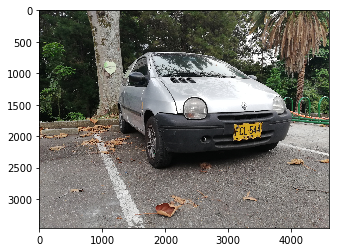

In [25]:
#obteniendo todas las imagenes en el directorio res
from matplotlib import pyplot as plt 
import os
import cv2
import numpy as np
import math
import argparse


def ls(ruta = os.getcwd()):
    return [arch.name for arch in os.scandir(ruta) if arch.is_file()]

directorio = str(os.getcwd()) + "\\res"
#Redimensionamos las imagenes a un tamaño de 600*600 para el procesamiento de las imagenes
arrayOfImages = ls(directorio)
#mostramos la primera imagen del directorio sin modificacion desde la adquisicion.
img = cv2.cvtColor(cv2.imread(directorio + "\\" + arrayOfImages[0]), cv2.COLOR_BGR2RGB)
plt.imshow(img)

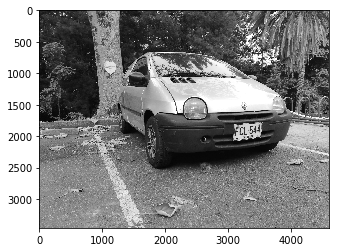

In [29]:
#Ahora mostramos la primera imagen en el canal value del hsv es decir en scala de grises solo conservando la instensidad
img2 = cv2.cvtColor(cv2.imread(directorio + "\\" + arrayOfImages[0]), cv2.COLOR_BGR2HSV)
plt.imshow(img2[:,:,2], cmap="gray")

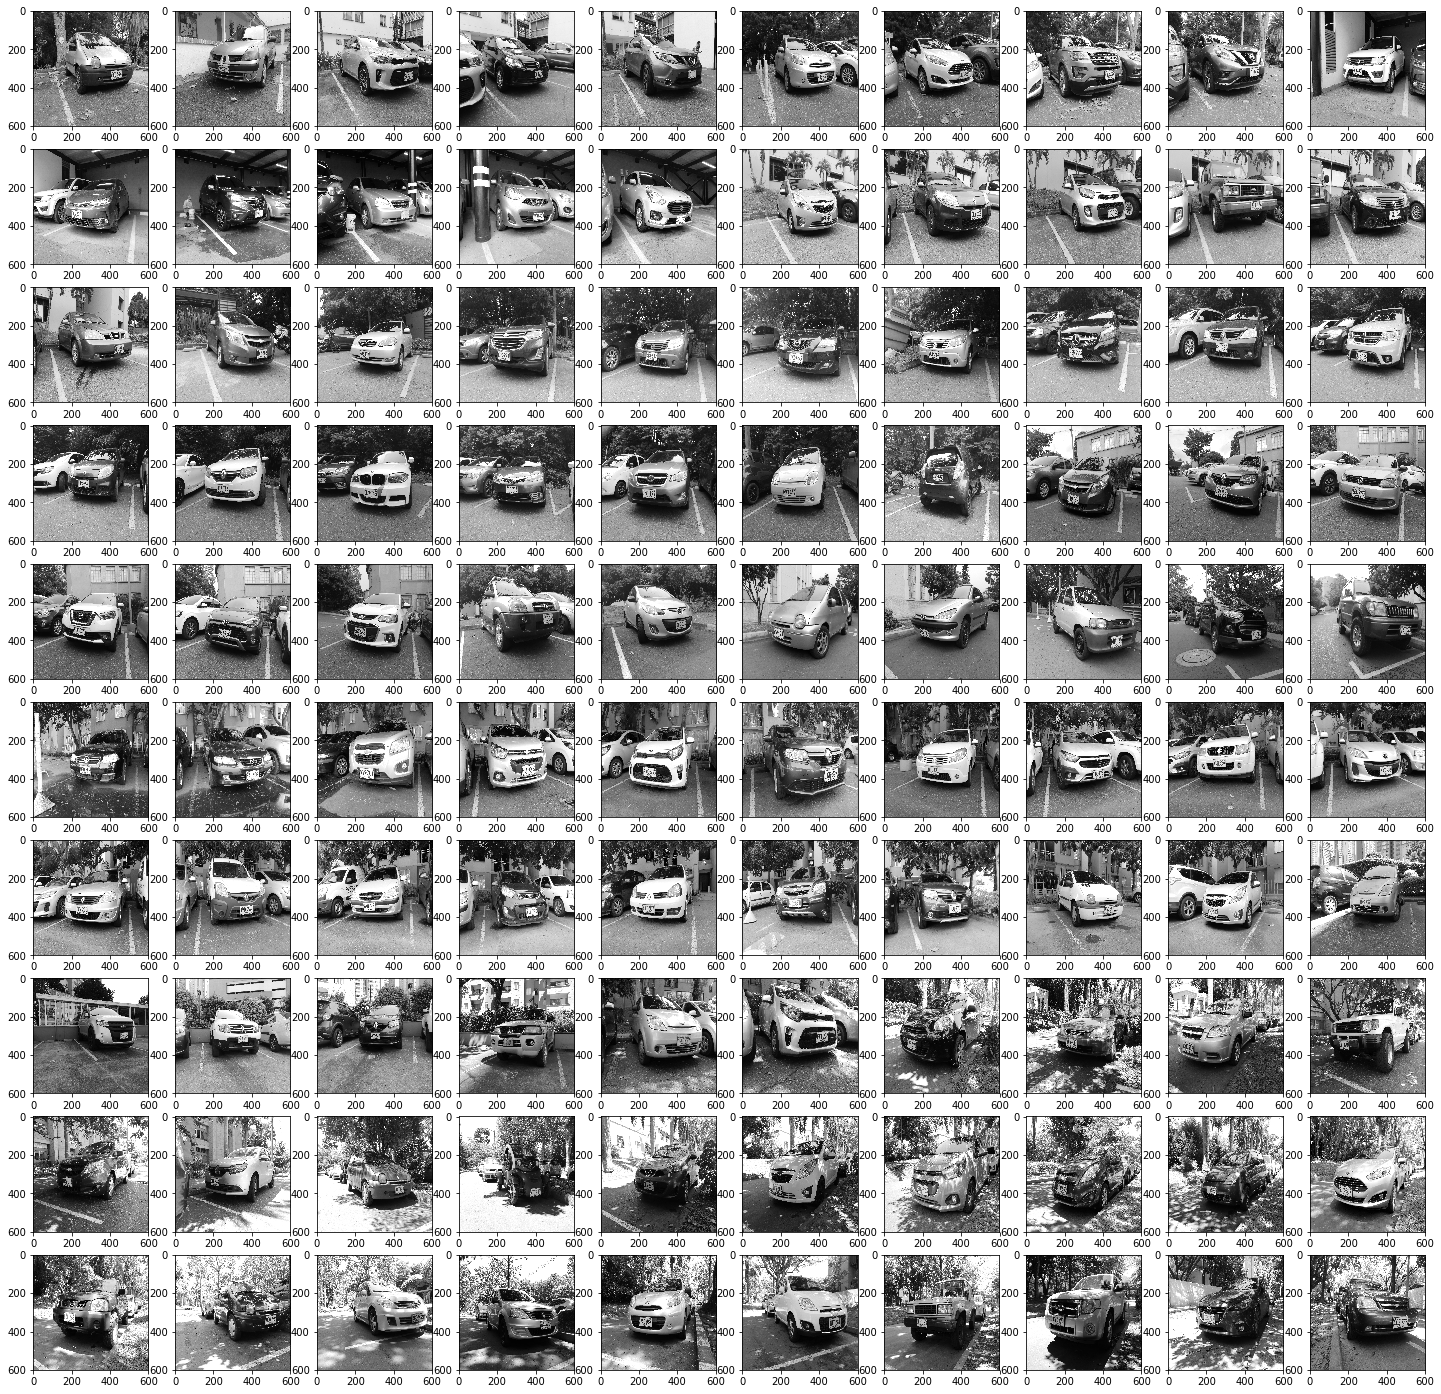

In [3]:
i = 0
j = 0
fig,arreglo_plots0 = plt.subplots(10,10, figsize=(25, 25))
for image in arrayOfImages:
    img = cv2.cvtColor(cv2.imread(directorio + "\\" + image), cv2.COLOR_BGR2HSV)
    #Redimensionamos las imagenes a un tamaño de 600*600 para el procesamiento de las imagenes
    #Solo consideramos el canal de intensidad para nuestros propositos
    arrayOfImages[i] = cv2.resize(img, (600, 600))[:,:,2]
    i += 1
k = 0
for i in range(0, 10):
    for j in range(0, 10):
        arreglo_plots0[i][j].imshow(arrayOfImages[k], cmap="gray")
        k += 1

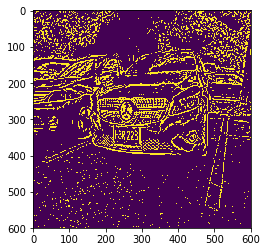

In [23]:
value = arrayOfImages[27]
# obtenemos el kernel para aplicar las operaciones morfologicas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# aplicando algunas transformaciones morfologicas a la imagen
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)


# a la matriz del canal value le sumo la operacion morfologica topHat y luego a la matriz resultante le resto la operacion morfologica blackHat
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)


# aplico un filtro gaussiano sobre la matriz resultante subtract
blur = cv2.GaussianBlur(subtract, (5, 5), 0)

thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 12)
plt.imshow(thresh)